# Titanic Kaggle Project
## Project Overview:
You are provided with a train and test dataset to build an ML model to predict survival among Titanic Passengers.
Columns in dataset:
- PassengerID
- Survived: 0 = No, 1 = Yes
- Pclass: Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
- Name
- Sex: male, female
- Age: Age in years
- Sib: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton
### Libraries & Data Import
The below code cell is default from Kaggle

In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [79]:
### Other general libraries needed:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

In [80]:
#train_data = pd.read_csv("../input/titanic/train.csv")
# ignore above for offline work
# code for offline work
train_data = pd.read_csv('train.csv')
#test_data = pd.read_csv("../input/titanic/test.csv")
test_data = pd.read_csv("test.csv")

## Projects Attack Plan:
1. Understanding data:
   - Distributions (histograms, box plots) for numeric column
   - Value counts for non-numeric columns
   - Missing data
   - Correlations
2. Data Trends: Who is more likely to survive from averages?
   - by Class
   - by Gender
   - by Port
   - by Title
   - by Family Size
   - by Fare
   - by Cabin
3. Data Cleaning:
   - Filling data gaps
   - Normalize columns
   - Process relevant columns to numeric to be used in a model
4. Modeling

## Exploratory Data Analysis
### Understanding data

In [81]:
# combine data for feature engineering later
train_data['train_test']=1
test_data['train_test']=0
test_data['Survived']= np.NaN
all_data = pd.concat([train_data, test_data]).copy()

In [82]:
#check it's fine
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

### Train Data EDA

In [83]:
# quick look into data types and missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


<AxesSubplot:>

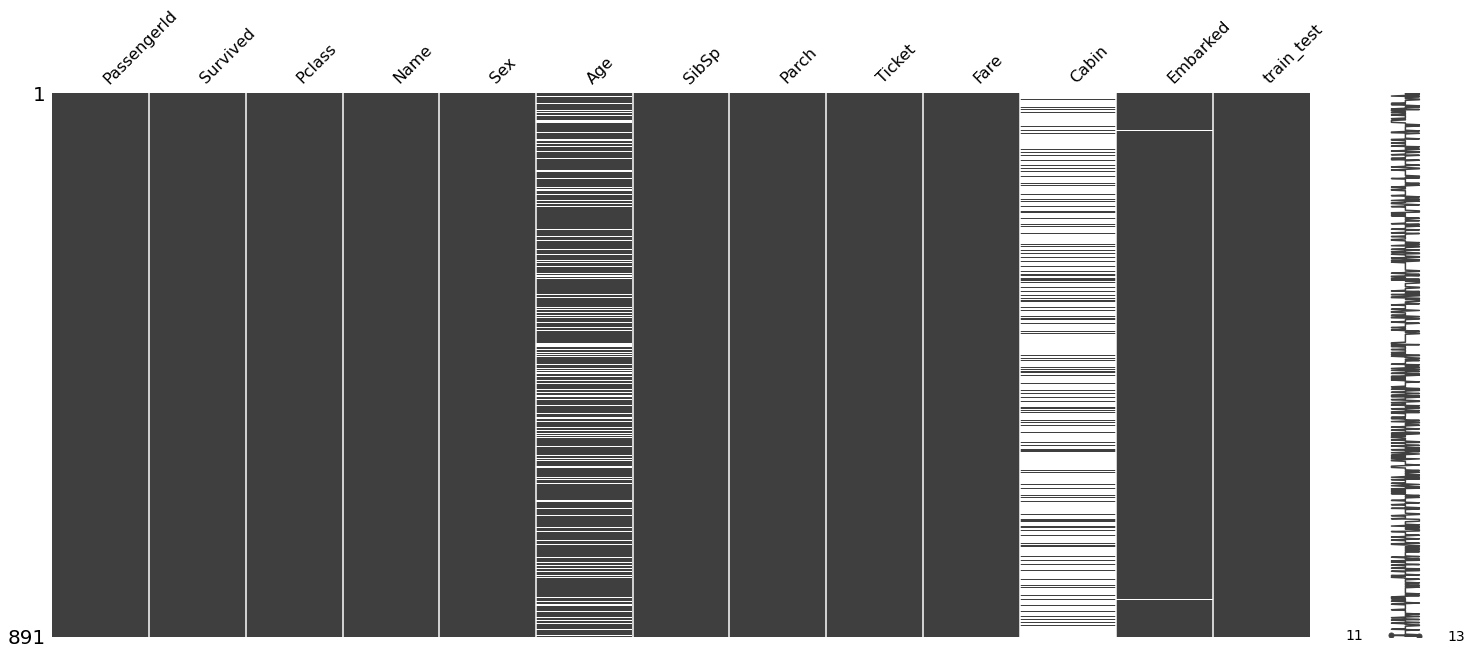

In [84]:
missingno.matrix(train_data)

1. Age, Cabin and Embarked seem to have missing values, Cabin has almost 700 missing values, Age ~180 and a couple for Embarked (which we could exclude). The missing matrix did not notable distributions.
2. All other columns seem fine and don't need evaluation for data filling.

In [85]:
# quick look at numeric data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [86]:
# split train dataset in numeric and non-numeric columns
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [87]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [88]:
# split between numeric and non-numeric
train_data_num = train_data[['Age','SibSp','Parch','Fare']].copy()
train_data_cat = train_data[['Survived','Pclass','Name','Sex','Ticket','Cabin','Embarked']].copy()

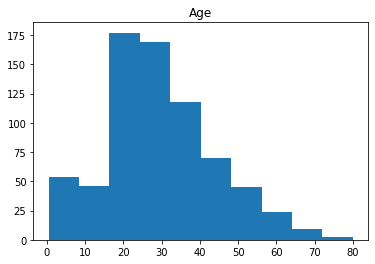

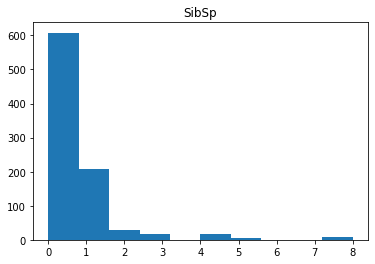

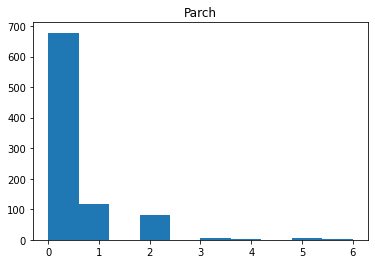

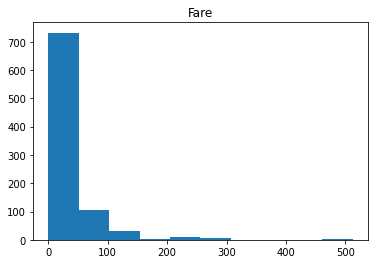

In [89]:
#histogram distributions for all numeric columns
for i in train_data_num.columns:
    plt.hist(train_data_num[i])
    plt.title(i)
    plt.show()

None of the distributions looks normal. Should we consider normalizing any of these columns or classifying them into bands?
Normalize candidates:
    - Fare (spike at low fare)
    - SibSp ?
    - Parch ?
Group into bands:
    - Age
    - Parch ?
    - SibSp ?

<AxesSubplot:>

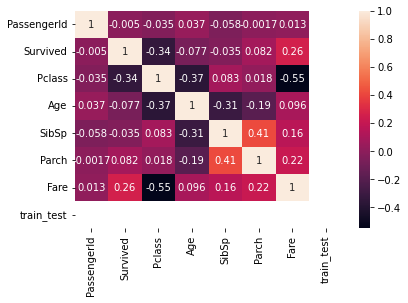

In [90]:
train_data_corr = train_data.corr()
sns.heatmap(train_data_corr, annot=True)

Notable correlations to Survived:
    - Pclass (negative means First Class gives you higher chances)
    - Fare is weakly positively correlated
    - Age is not particularly correlated

In [91]:
# Avg Age, SibSp, Parch, Fare by Survival
pd.pivot_table(train_data, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


- Survivors are slightly younger, but we would need to segment more (by Gender, Class and maybe Embarked) to get some insights from this column;
- Fare paid by Survived is over 2x the one paid by who did not make it;
- Higher # of parents seems to give you a slightly higher chance;
- SibSp lower seems to give more chances

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


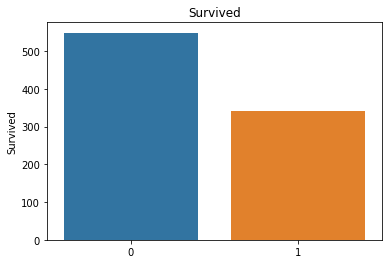

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


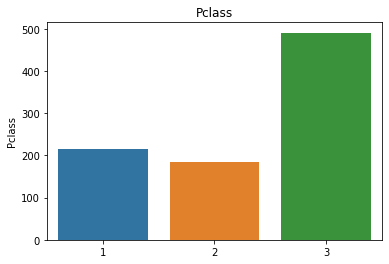

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


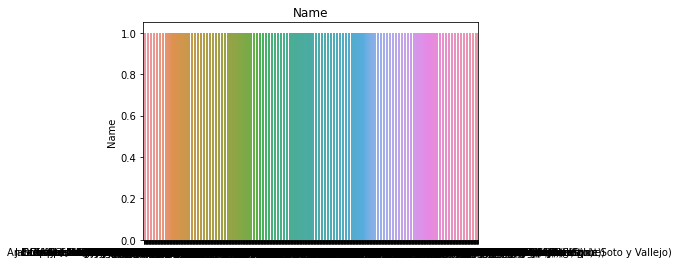

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


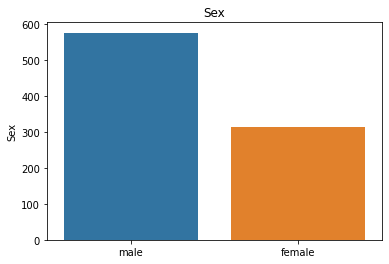

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


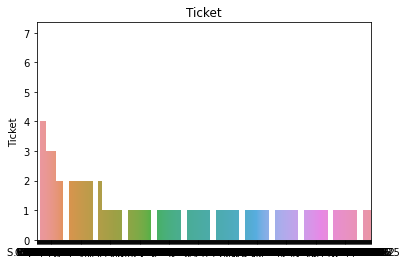

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


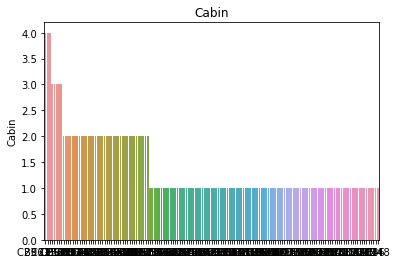

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


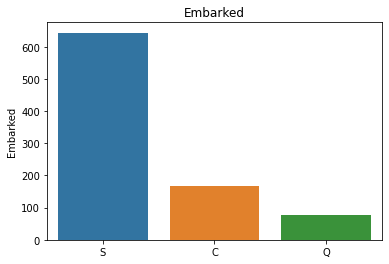

In [92]:
# Look into Survival Rate by Category Columns
for i in train_data_cat.columns:
    sns.barplot(train_data_cat[i].value_counts().index , train_data_cat[i].value_counts()).set_title(i)
    plt.show()

Ticket and Cabin might require some work. But we are going to probably drop Cabin as there are too many missing values.

### Age
Let's take a closer look at Age. We start by looking at Age distribution by Sex

In [93]:
# Look at Age distribution by both Sex
# Let's look at age distribution (Male vs Female)
train_data_female = train_data[train_data['Sex']=='female'].copy()
train_data_male = train_data[train_data['Sex']=='male'].copy()
train_data_female['Age'].value_counts(bins=10, dropna=False).sort_index()
train_data_male['Age'].value_counts(bins=10, dropna=False).sort_index()

(0.339, 8.378]       28
(8.378, 16.336]      23
(16.336, 24.294]    109
(24.294, 32.252]    117
(32.252, 40.21]      74
(40.21, 48.168]      46
(48.168, 56.126]     29
(56.126, 64.084]     16
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age, dtype: int64

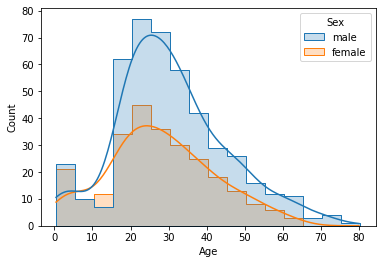

In [94]:
sns.histplot(data=train_data, x="Age", binwidth=5,kde=True, hue='Sex', element='step')
plt.show()

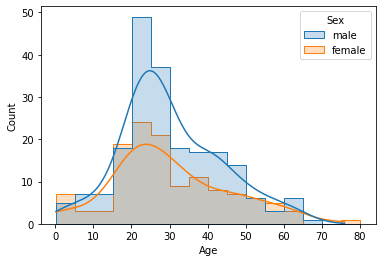

In [95]:
sns.histplot(data=test_data, x="Age", binwidth=5,kde=True, hue='Sex', element='step')
plt.show()

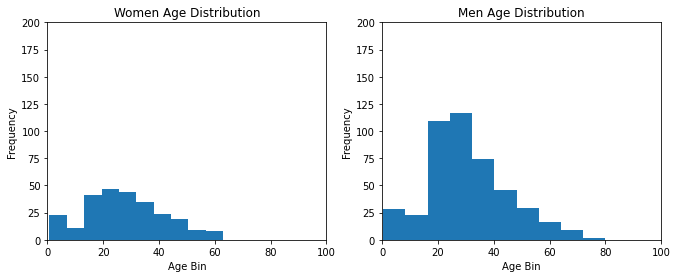

In [96]:
#Age distribution
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
train_data_female['Age'].plot.hist()
plt.title('Women Age Distribution')
plt.xlim(0,100)
plt.ylim([0,200])
plt.xlabel(('Age Bin'))

plt.subplot(1,2,2)
train_data_male['Age'].plot.hist()
plt.title('Men Age Distribution')
plt.xlim(0,100)
plt.ylim([0,200])
plt.xlabel(('Age Bin'))

plt.show()

Distribution does not look too messy. We should be able to fill missing data by Sex and Pclass averages. No need to use medians, not many outliers.

In [97]:
train_data[['Sex','Pclass','Age','Survived']].groupby(['Sex','Pclass']).mean()
#avg_ages = train_data[['Sex','Pclass','Age']].groupby(['Sex','Pclass']).mean()

Age  Survived
Sex    Pclass                     
female 1       34.611765  0.968085
       2       28.722973  0.921053
       3       21.750000  0.500000
male   1       41.281386  0.368852
       2       30.740707  0.157407
       3       26.507589  0.135447

In [98]:
# Pclass, Embarked, Sex  averages for Age and Survival Rate
train_data[['Sex','Pclass','Embarked','Age','Survived']].groupby(['Embarked','Sex']).mean()

Pclass        Age  Survived
Embarked Sex                                  
C        female  1.726027  28.344262  0.876712
         male    2.010526  32.998841  0.305263
Q        female  2.888889  24.291667  0.750000
         male    2.926829  30.937500  0.073171
S        female  2.197044  27.771505  0.689655
         male    2.421769  30.291440  0.174603

In [99]:
# Age by Pclass and Sex
pvt_ages = pd.pivot_table(train_data, values='Age', index='Sex', columns='Pclass')
pd.pivot_table(train_data, values='Age', index='Sex', columns='Pclass')
#pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat',columns='gender')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


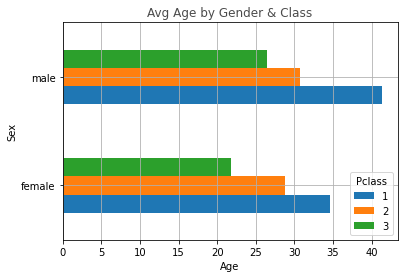

In [100]:
# Let's plot Age by Sex and Class
pvt_ages.plot(kind='barh',grid=True)
plt.title('Avg Age by Gender & Class',alpha=0.7)
plt.xlabel('Gender')
plt.xlabel('Age')
plt.show()

In [101]:
# Survival Rate by Sex and Class
pvt_survival = pd.pivot_table(train_data, values='Survived', index='Sex', columns='Pclass')
pd.pivot_table(train_data, values='Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


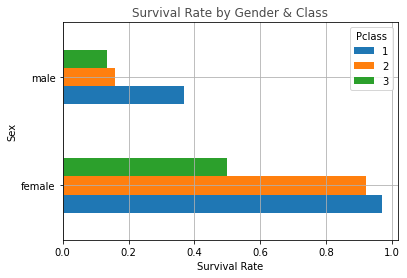

In [102]:
# Let's plot Age by Sex and Class
pvt_survival.plot(kind='barh',grid=True)
plt.title('Survival Rate by Gender & Class',alpha=0.7)
plt.xlabel('Gender')
plt.xlabel('Survival Rate')
plt.show()

Things we notice regarding Age:
- Female survival rate is much higher in first & second class vs any other group and even 3rd class women has a higher survival rate vs Men in 1st class.
- People embarked at Southampton seem to have a lower survival rate within the same gender and class categories.

### Embarked
There are only 2 missing values in the train dataset, we will either remove those 2 rows or fill with the most common value which is S (Southampton) from the previous chart:

In [103]:
train_data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [104]:
test_data['Embarked'].value_counts(dropna=False)

S    270
C    102
Q     46
Name: Embarked, dtype: int64

We are going to fill train_data with S. Test data does not need to be filled

### Cabin
There are a lot of missing values. We are going to take a look into this column to see if there is something we can do to fill the gaps or categorize this column differently

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


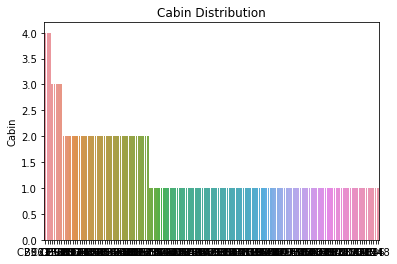

In [105]:
sns.barplot(train_data['Cabin'].value_counts().index, train_data['Cabin'].value_counts()).set_title('Cabin Distribution')
plt.show()
# ~80% is not available, we don't think there is a way to fill

### Fare
We might want to normalize this column as most values are towards the lowest values

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


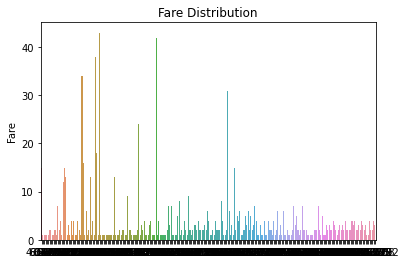

In [106]:
sns.barplot(train_data['Fare'].value_counts().index, train_data['Fare'].value_counts()).set_title('Fare Distribution')
plt.show()

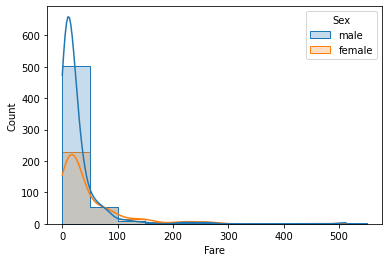

In [107]:
sns.histplot(data=train_data, x="Fare", binwidth=50,kde=True, hue='Sex', element='step')
plt.show()

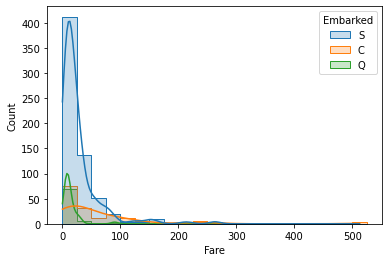

In [108]:
sns.histplot(data=train_data, x="Fare", binwidth=25, kde=True, hue='Embarked', element='step')
plt.show()

### Name
Let’s see if we can extract something from names

In [109]:
train_data['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [110]:
# We can see titles such as Mr. Miss. but also Dr. Let's isolate and see what we can find:
def extract_title(s):
    title = (s.split(',')[1]).split('. ')[0].strip()
    return title
titles = train_data['Name'].apply(extract_title)
titles.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [111]:
titles_2 = test_data['Name'].apply(extract_title)
titles_2.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64

In [112]:
# We can create a new column called Title and later map into a numeric in order to use it in our model.
all_data['Title'] = all_data['Name'].apply(extract_title)
all_data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

## Data Processing for Model
1. Fill missing values:
    - Embarked
    - Age
2. Normalize Fare using logarithmic scale
3. Categorize Title column
4. Include only relevant columns (drop what we do not need)
5. Map data to numeric/Scale from 0-1 with standard scaler

### Fill missing values: Embarked

In [113]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')
all_data['Embarked'].value_counts(dropna=False)

S    916
C    270
Q    123
Name: Embarked, dtype: int64

### Fill missing values: Age

In [114]:
# Fill NaN values with Avg age by gender and ticket class, we do it on the full dataset so we have the best distribution
all_data['Age_filled'] = all_data.groupby(['Sex','Pclass'])['Age'].transform(lambda grp: grp.fillna(np.mean(grp)))
all_data['Age'] = all_data['Age_filled']
all_data = all_data.drop('Age_filled', axis=1)

### Normalize Fare using logarithmic scale

In [115]:
#Fill Missing Value
all_data['Fare'] = all_data['Fare'].fillna(all_data.Fare.median())
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  train_test   1309 non-null   int64  
 13  Title        1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


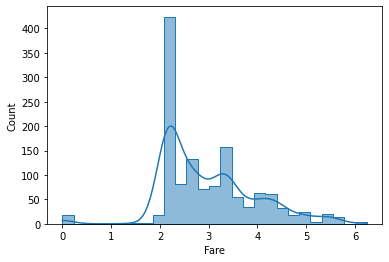

In [116]:
norm_fare = np.log(all_data.Fare+1)
sns.histplot(data=norm_fare,kde=True, element='step')
plt.show()

In [117]:
all_data['Norm_Fare'] = np.log(all_data.Fare+1)

In [118]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  train_test   1309 non-null   int64  
 13  Title        1309 non-null   object 
 14  Norm_Fare    1309 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 163.6+ KB


### Categorize Title Column

In [119]:
# prepare dictionary
title_dictionary = {"Mr":"Mr",
                    "Miss":"Miss",
                    "Mrs":"Mrs",
                    "Master":"Master",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Mlle":"Miss",
                    "Mme":"Mrs",
                    "Capt":"Officer",
                    "Sir":"Noble",
                    "Jonkheer":"Noble",
                    "Lady":"Noble",
                    "Ms":"Mrs",
                    "Don":"Noble",
                    "the Countess":"Noble",
                    "Dona":"Noble"}
# update titles definition
all_data['Title'] = all_data['Title'].map(title_dictionary)

### Drop Columns not needed

In [120]:
# Drop columns not needed
all_data = all_data.drop(['Name','Ticket','Cabin','Fare'],axis=1)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,train_test,Title,Norm_Fare
0,1,0.0,3,male,22.0,1,0,S,1,Mr,2.110213
1,2,1.0,1,female,38.0,1,0,C,1,Mrs,4.280593
2,3,1.0,3,female,26.0,0,0,S,1,Miss,2.188856
3,4,1.0,1,female,35.0,1,0,S,1,Mrs,3.990834
4,5,0.0,3,male,35.0,0,0,S,1,Mr,2.202765


### Map Data to Numeric
Should we use a preprocess scaler?
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [121]:
# map Sex, Title
sex_map = { 'female':0 , 'male':1 }
# map Title
title_map = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Officer':4, 'Noble':5}
# map Embark
embark_map = {'S':0, 'C':1, 'Q':2}

# let's focus on non-numeric categories for now, thus skipping Fare, Cabin, Family Size, Age in mapping bands etc for now
all_data['Sex'] = all_data['Sex'].map(sex_map)
all_data['Title'] = all_data['Title'].map(title_map)
all_data['Embarked'] = all_data['Embarked'].map(embark_map)

## Model Building
Before going further we need to split again the dataset into train and test.
Then we can move ahead importing all libraries for ML and building different models and checking their accuracy

In [122]:
#X_train = all_data[all_data['train_test']==1].drop(['train_test'],axis=1)
X_train = all_data[all_data.train_test == 1].drop(['train_test','Survived'], axis =1)

#X_test = all_data[all_data['train_test']==0].drop(['train_test'],axis=1)
# there is a missing value for Norm_Fare we are going to exclude it from X_test
X_test = all_data[all_data.train_test == 0  ].drop(['train_test','Survived'], axis =1)

#y_train = all_data[all_data.train_test==1].Survived
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(891,)

In [143]:
# Import ML libraries
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Initial Model Run & Results
We are going to run a bunch of models. See their initial training results and based on that we are goint to submit some to check how their scores compare.
1. Baysian
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. KNN
6. SVC
7. *XGBoost (not available)*
8. Voting Classifier (uses the above model and combines them)

In [124]:
# Baysian as baseline model
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train)
print(cv)
print(cv.mean())

[0.77094972 0.78089888 0.80337079 0.79775281 0.82022472]
0.7946393823363254


In [125]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80446927 0.81460674 0.78651685 0.8258427  0.81460674]
0.8092084614901764


In [134]:
# Decision Tree Classifier
dt = tree.DecisionTreeClassifier(random_state = 1, max_depth=3)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84357542 0.80898876 0.8258427  0.78089888 0.83707865]
0.8192768815516918


In [127]:
# KNN
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61452514 0.43258427 0.46629213 0.42134831 0.61235955]
0.5094218818655452


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X do

In [128]:
# Random Forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.69832402 0.80898876 0.87078652 0.79775281 0.83707865]
0.8025861527838805


In [129]:
# SVC
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61452514 0.61797753 0.61797753 0.61797753 0.61235955]
0.6161634548992531


In [130]:
# XGBoost excude as it does not run on this machine right now
#xgb = XGBClassifier(random_state =1)
#cv = cross_val_score(xgb,X_train,y_train,cv=5)
#print(cv)
#print(cv.mean())

In [131]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft')

In [132]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[0.67039106 0.79213483 0.8258427  0.80337079 0.82022472]
0.7823928190320759


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Training Summary:**
- Baysian 79.46%
- Logistic 80.92%
- Decision Tree 81.93%
- KNN 50.94%
- Support Vector Classifier 61.62%
- XGBoost not available
- Soft Voting Classifier: 78.24%

It's entirely possible that some of the models are overtrained. So we need to try to predict with test data and submit in order to get the correct ranking.

In [141]:
# Baysian Initial Submission
gnb.fit(X_train, y_train)
gnb_cv = gnb.predict(X_test).astype(int)
gnb_submission = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': gnb_cv})
gnb_submission.to_csv('my_submission_baysian_1.csv', index=False)
print('Your Baysian submission was successfuly saved!')

Your Baysian submission was successfuly saved!


In [137]:
# Decision Tree Initial Submission
dt.fit(X_train,y_train)
dt_vc = dt.predict(X_test).astype(int)
dt_submission = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': dt_vc})
dt_submission.to_csv('my_submission_decision_tree_1.csv', index=False)
print("Your Decision Tree submission was successfully saved!")

Your Decision Tree submission was successfully saved!


In [138]:
# Random Forest Initial Submission
rf.fit(X_train,y_train)
rf_vc = rf.predict(X_test).astype(int)
rf_submission = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': rf_vc})
rf_submission.to_csv('my_submission_random_forest_x.csv',index=False)
print('Your Random Forest submission was successfully saved!')

Your Random Forest submission was successfully saved!


In [139]:
# Logistic Regression Initial Submission
lr.fit(X_train,y_train)
lr_vc = lr.predict(X_test).astype(int)
lr_submission = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': lr_vc})
lr_submission.to_csv('my_submission_logistic_regression_x.csv',index=False)
print('Your Logistic Regression submission was successfully saved!')

Your Logistic Regression submission was successfully saved!


In [140]:
# Voting Regressor Initial Submission
voting_clf.fit(X_train,y_train)
voting_clf_cv = voting_clf.predict(X_test).astype(int)
voting_clf_submission = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': voting_clf_cv})
voting_clf_submission.to_csv('my_submission_voting_classifier_x.csv',index=False)
print('Your Voting Classifier submission was successfully saved!')

Your Voting Classifier submission was successfully saved!


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Model Feature Engineering
The model that currently gives us the best actual prediction (not training) from this notebook is the voting classifier at 78.23%, followed by Decision Tree and Logistic Regression both at 76.55%. Random Forest at 75.60% and Baysian at 75.36%

In [145]:
# create a function to report model performance
def model_perf(classifier, model_name):
    print(model_name)
    print('Top Score: '+ str(classifier.best_score_))
    print('Best Hyperparameters' + str(classifier.best_params_))

In [147]:
# Logistic Regressor Tuning
lr_t = LogisticRegression()
lr_param_dict = {'max_iter': [2000],
              'penalty': ['l1','l2'],
              'C':np.logspace(-4,4,20),
              'solver':['liblinear']}
clf_lr_t = GridSearchCV(lr_t, param_grid = lr_param_dict, cv=5, verbose=True, n_jobs = -1)
best_clf_lr_t = clf_lr_t.fit(X_train, y_train)
model_perf(best_clf_lr_t, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Top Score: 0.8126106333563492
Best Hyperparameters{'C': 0.03359818286283781, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [150]:
best_lr_t = LogisticRegression(max_iter=2000, penalty='l2', C=0.0335981286283781, solver='liblinear')
best_lr_t.fit(X_train,y_train)
best_lr_t_cv = best_lr_t.predict(X_test).astype(int)
best_lr_submission = pd.DataFrame({'PassengerId':X_test.PassengerId, 'Survived':best_lr_t_cv})
best_lr_submission.to_csv('my_submission_logistic_tuned_2.csv', index=False)
print('Your Logistic Regressor Tuned submission was successfully saved!')

Your Logistic Regressor Tuned submission was successfully saved!


In [ ]:
#lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)